In [3]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

In [6]:
import numpy as np
px = JPD(['X'], [2], np.array([12,8])/20)
print(px)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [13]:
py = JPD(['Y'], [2], np.array([10,10])/20)
print(py)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [14]:
pxy = JPD(['X','Y'], [2,2], np.array([3,9,7,1])/20)
print(pxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


In [4]:
pxy = JPD(['X','Y'], [2,2], np.array([0.2,0.2,0.4333,0.1667]))
print(pxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.2000 |
+------+------+----------+
| X(0) | Y(1) |   0.2000 |
+------+------+----------+
| X(1) | Y(0) |   0.4333 |
+------+------+----------+
| X(1) | Y(1) |   0.1667 |
+------+------+----------+


In [35]:
pxy2 = JPD(['X','Y'], [2,2], np.array([6,6,4,4])/20)
print(pxy2)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+


In [20]:
pmx = pxy.marginal_distribution(['X'], inplace=False) # X를 남겨라
print(pmx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [21]:
pmx2 = pxy.marginalize(['Y'], inplace=False)  # Y를 없애라
print(pmx2)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [23]:
px_on_x0 = pxy.conditional_distribution([('X',0)], inplace=False)
print(px_on_x0)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.2500 |
+------+--------+
| Y(1) | 0.7500 |
+------+--------+


In [24]:
px_on_x1 = pxy.conditional_distribution([('X', 1)], inplace=False)
print(px_on_x1)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.8750 |
+------+--------+
| Y(1) | 0.1250 |
+------+--------+


In [27]:
pxy.check_independence(['X'],['Y']), pxy2.check_independence(['X'],['Y'])

(False, True)

In [29]:
print(px*py)
print(pxy)
print(pxy2)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+
+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+
+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+


In [34]:
print(pxy2)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [36]:
print(pxy2.conditional_distribution([('X', 0)], inplace=False))

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [37]:
print(pxy2.check_independence(['X'],['Y']))


True


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

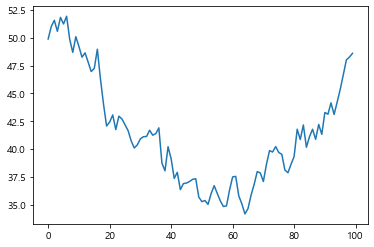

In [3]:
X_returns = np.random.normal(0, 1, 100)
X = pd.Series(np.cumsum(X_returns), name='X') + 50
plt.plot(X)

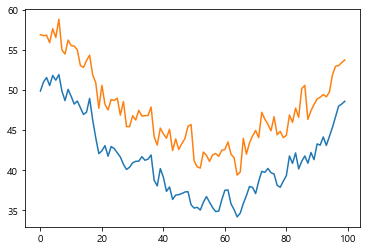

In [4]:
some_noise = np.random.exponential(1,100)
Y = X + 5 + some_noise
Y.name = "Y"
Z = pd.concat([X,Y],axis=1)
plt.plot(Z)

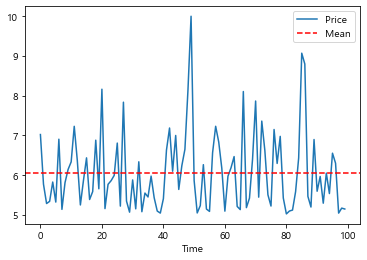

In [5]:
plt.plot(Y-X)
plt.axhline((Y-X).mean(), color='red', linestyle='--')
plt.xlabel('Time')
plt.legend(['Price', 'Mean'])

In [6]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
score, pvalue, _ = coint(X,Y)
pvalue

8.124265093450072e-12

In [7]:
Y2 = pd.Series(np.random.normal(0,1,1000), name='Y2') + 20
Y3 = Y2.copy()

In [8]:
for i in range(0,1000,100):
    if (i/100)%2 == 0:
        Y3[i:i+100] = 30
    else:
        Y3[i:i+100] = 10


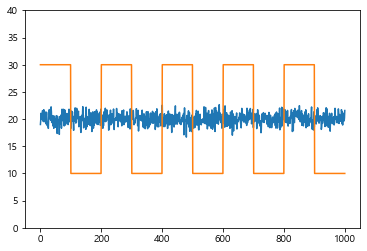

In [9]:
plt.plot(Y2)
plt.plot(Y3)
plt.ylim([0,40])
plt.show()

C:\Users\ghdak\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ghdak\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


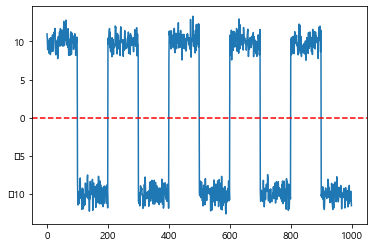

In [10]:
plt.plot(Y3-Y2)
plt.axhline((Y3-Y2).mean(), color='red', linestyle='--')
plt.show()

In [11]:
core, pvalue, _ = coint(Y2,Y3)
pvalue

0.0

In [43]:
from pgmpy.factors.discrete import TabularCPD

In [48]:
cpd_X = TabularCPD('X', 2, [[1 - 0.002], [0.002]])
print(cpd_X)


+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [80]:
from pgmpy.factors.discrete import TabularCPD
# C = 0
cpd_X = TabularCPD('X', 3, [[1/3], [1/3], [1/3]])
cpd_C = TabularCPD('C', 3, [[1/3], [1/3], [1/3]])
print(cpd_X)
print(cpd_C)

+------+----------+
| X(0) | 0.333333 |
+------+----------+
| X(1) | 0.333333 |
+------+----------+
| X(2) | 0.333333 |
+------+----------+
+------+----------+
| C(0) | 0.333333 |
+------+----------+
| C(1) | 0.333333 |
+------+----------+
| C(2) | 0.333333 |
+------+----------+


In [81]:
cpd_H = TabularCPD('H', 3, np.array([[0,0,0,0,0.5,1,0,1,0.5],[0.5,0,1,0,0,0,1,0,0.5],[0.5,1,0,1,0.5,0,0,0,0]]), evidence=['X','C'], evidence_card=[3,3])
print(cpd_H)

+------+------+------+------+------+------+------+------+------+------+
| X    | X(0) | X(0) | X(0) | X(1) | X(1) | X(1) | X(2) | X(2) | X(2) |
+------+------+------+------+------+------+------+------+------+------+
| C    | C(0) | C(1) | C(2) | C(0) | C(1) | C(2) | C(0) | C(1) | C(2) |
+------+------+------+------+------+------+------+------+------+------+
| H(0) | 0.0  | 0.0  | 0.0  | 0.0  | 0.5  | 1.0  | 0.0  | 1.0  | 0.5  |
+------+------+------+------+------+------+------+------+------+------+
| H(1) | 0.5  | 0.0  | 1.0  | 0.0  | 0.0  | 0.0  | 1.0  | 0.0  | 0.5  |
+------+------+------+------+------+------+------+------+------+------+
| H(2) | 0.5  | 1.0  | 0.0  | 1.0  | 0.5  | 0.0  | 0.0  | 0.0  | 0.0  |
+------+------+------+------+------+------+------+------+------+------+


In [82]:
from pgmpy.models import BayesianModel
model = BayesianModel([(('X','H'),('C','H'))])
model.add_cpds(cpd_X, cpd_C, cpd_H)
model.check_model()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  warnings.warn(


ValueError: ('CPD defined on variable not in the model', <TabularCPD representing P(X:3) at 0x26cc1606580>)

In [36]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
posterior = inference.query(["X"], evidence={'H':1})
print(posterior)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [ ]:
# montihole
from pgmpy.models import BayesianModel

model = BayesianModel(['X','C','H'])
model.add

In [96]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the network structure
model = BayesianModel([('C', 'H'), ('X', 'H')])

# Defining the CPDs:
cpd_c = TabularCPD('C', 3, [[1/3], [1/3], [1/3]])
cpd_p = TabularCPD('X', 3, [[1/3], [1/3], [1/3]])
cpd_h = TabularCPD('H', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5], 
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5], 
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['C', 'X'], evidence_card=[3, 3])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)

# Some other methods
model.get_cpds()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  warnings.warn(


[<TabularCPD representing P(C:3) at 0x26cc152c460>,
 <TabularCPD representing P(X:3) at 0x26cc152c490>,
 <TabularCPD representing P(H:3 | C:3, X:3) at 0x26cc152cc70>]

In [97]:
model.check_model()

True

In [98]:
infer = VariableElimination(model)
posterior_p = infer.query(['X'], evidence={'C': 0, 'H': 2})
print(posterior_p)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.3333 |
+------+----------+
| X(1) |   0.6667 |
+------+----------+
| X(2) |   0.0000 |
+------+----------+


In [103]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
import numpy as np

pxy = JPD(['X','Y'], [2,2], np.array([6,6,13,5])/30)
print(pxy)
pxy.check_independence(['X'],['Y'])

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.2000 |
+------+------+----------+
| X(0) | Y(1) |   0.2000 |
+------+------+----------+
| X(1) | Y(0) |   0.4333 |
+------+------+----------+
| X(1) | Y(1) |   0.1667 |
+------+------+----------+


False